<h1> Data Exploring<h1>

In [2]:
import pandas as pd
df = pd.read_csv('D:\Per2\mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
df.shape

(1453, 15)

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [16]:
df.value_counts()

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  healthy  disgusting  Like          Age  VisitFrequency         Gender
No     Yes         No     Yes        Yes     Yes   Yes    No     No         No       Yes         I hate it!-5  59   Never                  Female    3
Yes    Yes         No     Yes        No      Yes   Yes    Yes    No         No       No          +4            38   Once a month           Female    3
                                     Yes     Yes   Yes    Yes    No         No       No          +2            20   Once a month           Male      3
                                                                                                 +4            30   Once a month           Female    2
                                                                                                 I love it!+5  26   More than once a week  Female    2
                                                                                                   

In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

The average values of the transformed binary numeric segmentation variables show that approximately 55% of the respondents perceive McDonald’s as YUMMY, while a significant majority of 91% believe that eating at McDonald’s is CONVENIENT. In contrast, only a minority of 9% think that McDonald’s food is SPICY

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
obj_columns = ['yummy', 'convenient', 'spicy', 'fattening',
               'greasy', 'fast', 'cheap', 'tasty', 'expensive',
               'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

# Create a label encoder
le = LabelEncoder()

# Apply label encoding to the specified columns
df[obj_columns] = df[obj_columns].apply(le.fit_transform)

# Select the data for analysis (first 11 columns)
data = df.iloc[:, :11]

# Calculate and print the mean of each column
column_means = data.mean()
print(column_means)


yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


In [37]:
from sklearn.decomposition import PCA

# Creating and fitting the PCA model
pca = PCA()
pca.fit(data)

# Explained variance ratio, singular values, and explained variance
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
explained_variance = pca.explained_variance_
components = pca.components_

# Printing the results
print("Explained Variance Ratio:")
print(explained_variance_ratio)

print("\nSingular Values:")
print(singular_values)

print("\nExplained Variance:")
print(explained_variance)

print("\nPrincipal Components (Loadings):")
print(components)


Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Singular Values:
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]

Explained Variance:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Principal Components (Loadings):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781

In [38]:
n_digits = 1  # Number of decimal places

# Print PCA results with limited decimal places
print(np.round(MD_pca.components_, n_digits))


[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


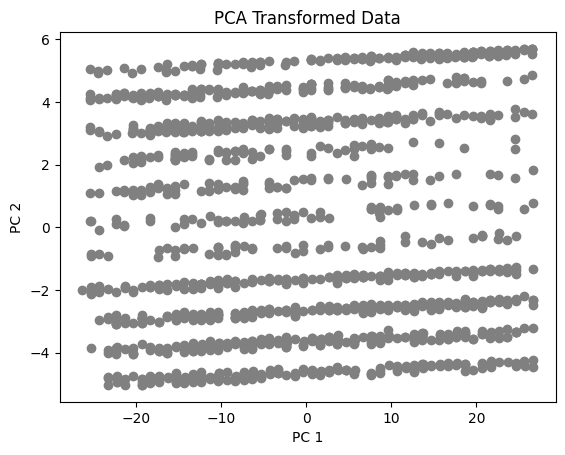

In [39]:


import matplotlib.pyplot as plt
plt.scatter(pca_df[:, 0], pca_df[:, 1], c='grey')
plt.title("PCA Transformed Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()



In [43]:
obj_columns=['yummy', 'convenient', 'spicy', 'fattening', 
             'greasy', 'fast', 'cheap', 'tasty', 'expensive', 
             'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']
from sklearn.preprocessing import LabelEncoder
lie=LabelEncoder()
for i in obj_columns:
    df[i]=lie.fit_transform(df[i])
    
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(data)
kmeans.cluster_centers_

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.00634921, 0.88888889, 0.06349206, 0.91428571, 0.53015873,
        0.94603175, 0.8984127 , 0.16190476, 0.01904762, 0.06984127,
        0.3968254 ],
       [0.01731602, 0.67532468, 0.08225108, 0.93506494, 0.74891775,
        0.74891775, 0.06060606, 0.08658009, 0.92207792, 0.05627706,
        0.72294372],
       [0.83617747, 0.98293515, 0.12286689, 0.97269625, 1.        ,
        0.94880546, 0.88737201, 0.95221843, 0.11262799, 0.19112628,
        0.12627986],
       [0.93072289, 0.97289157, 0.10542169, 0.65963855, 0.        ,
        0.95783133, 0.93975904, 0.96987952, 0.03313253, 0.44277108,
        0.01204819],
       [0.86170213, 0.96453901, 0.09219858, 0.89361702, 0.46808511,
        0.85460993, 0.0035461 , 0.93617021, 0.91134752, 0.18085106,
        0.07092199]])

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Define the range of cluster numbers to evaluate
n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize lists to store results
clusters_inertia = []
silhouette_scores = []

for n in n_clusters:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=n, init='k-means++')
    kmeans.fit(df)
    
    # Calculate inertia (within-cluster sum of squares) for the elbow method
    clusters_inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score for cluster quality evaluation
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Print the results
for n, inertia, silhouette_score in zip(n_clusters, clusters_inertia, silhouette_scores):
    print(f"Number of Clusters: {n}, Inertia: {inertia}, Silhouette Score: {silhouette_score}")


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Number of Clusters: 2, Inertia: 96719.70586964185, Silhouette Score: 0.5582841128355565
Number of Clusters: 3, Inertia: 60172.08339393911, Silhouette Score: 0.4409169676268056
Number of Clusters: 4, Inertia: 44290.69767618174, Silhouette Score: 0.3786820135387645
Number of Clusters: 5, Inertia: 37650.577622321995, Silhouette Score: 0.3244249498063618
Number of Clusters: 6, Inertia: 33464.14982745325, Silhouette Score: 0.2851236122564684
Number of Clusters: 7, Inertia: 30348.963375777315, Silhouette Score: 0.31974660133215854
Number of Clusters: 8, Inertia: 27108.281590837025, Silhouette Score: 0.306615667550728


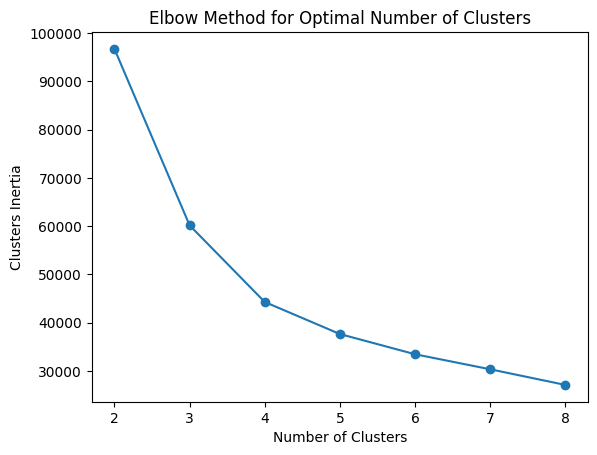

In [46]:
import matplotlib.pyplot as plt

# Function to create an elbow plot
def plot_elbow(n_clusters, clusters_inertia):
    plt.plot(n_clusters, clusters_inertia, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Clusters Inertia")
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.show()

# Assuming you have already calculated n_clusters and clusters_inertia
plot_elbow(n_clusters, clusters_inertia)
